In [2]:
#подключим модули
import pandas
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [3]:
#загрузим документ
dataframe = pandas.read_csv("C:/Users/Viktor/Documents/iris.data", header=None)
#прочитаем значение из документа
dataset = dataframe.values
#отделим значения от ответов
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

In [4]:
#Переход от текстовых меток к категориальному вектору
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = to_categorical(encoded_Y)


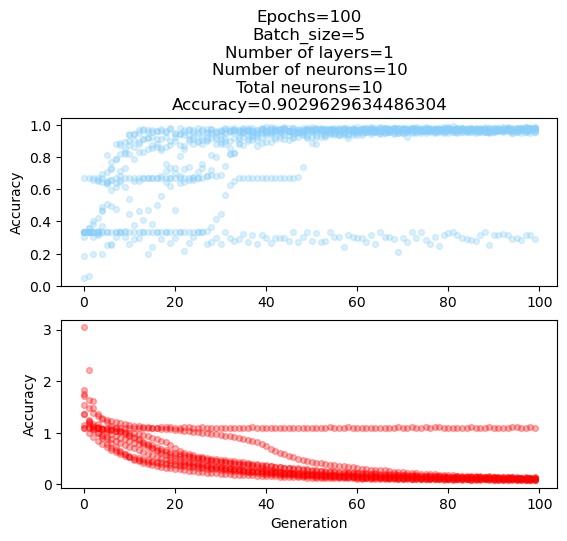

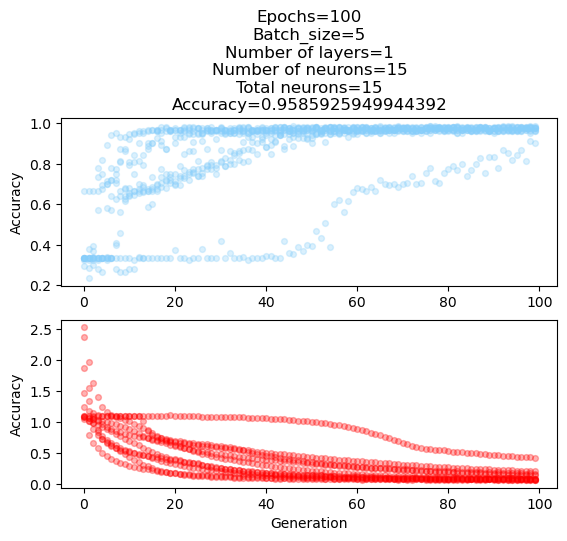

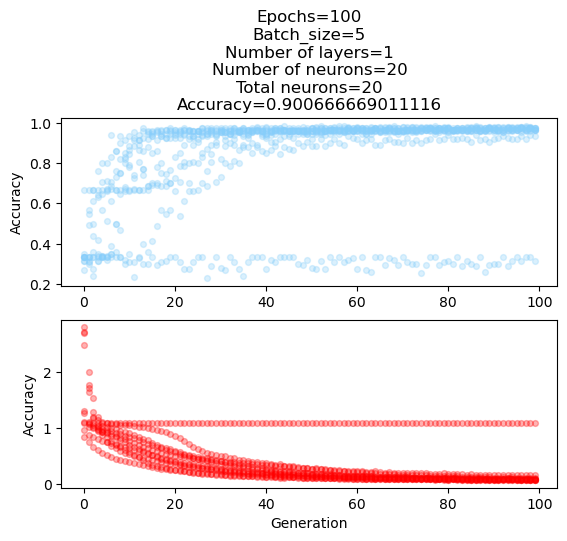

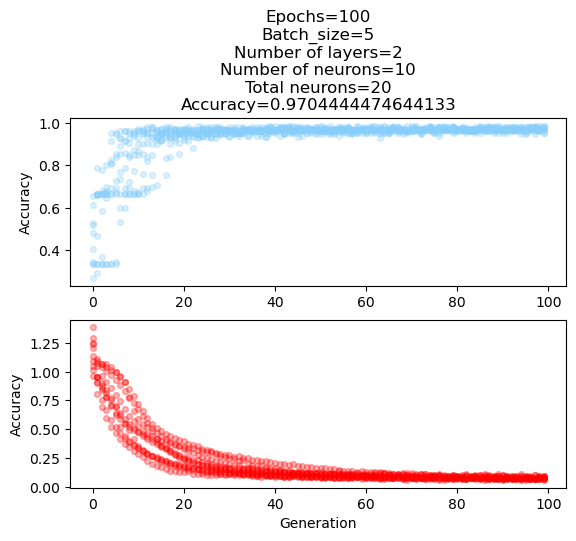

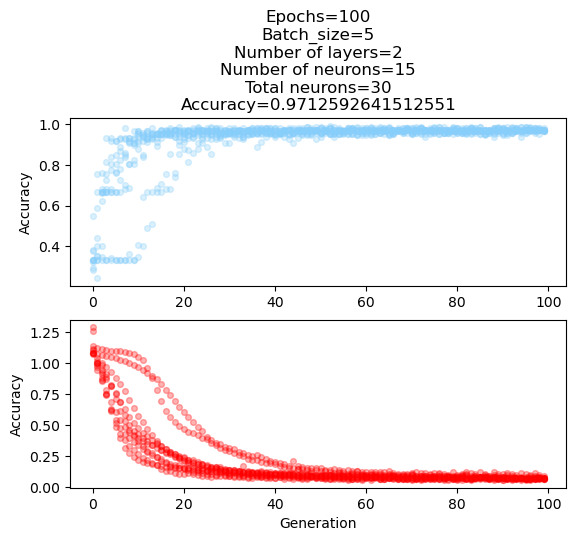

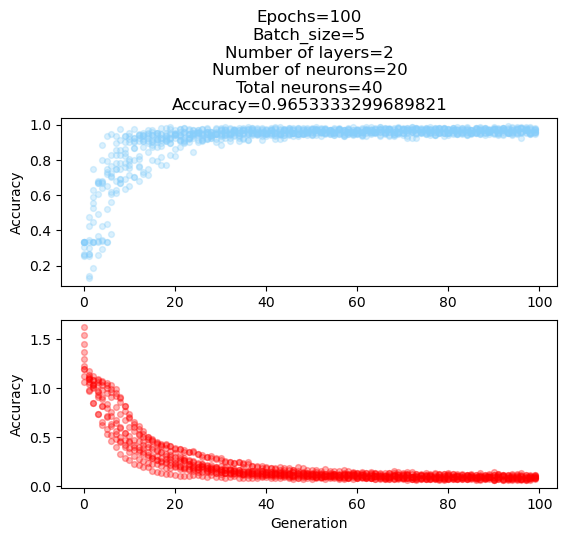

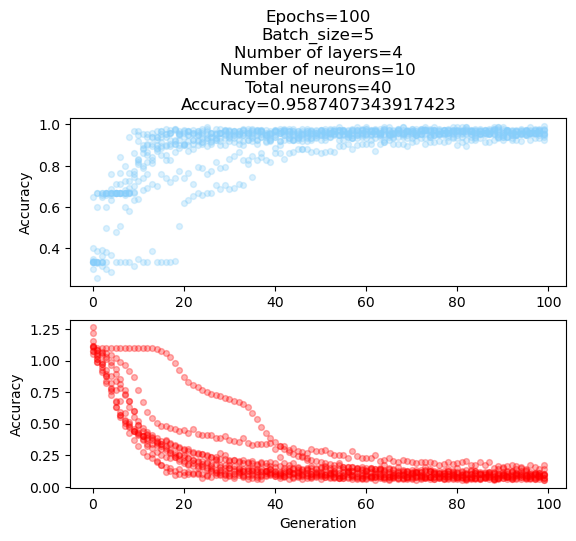

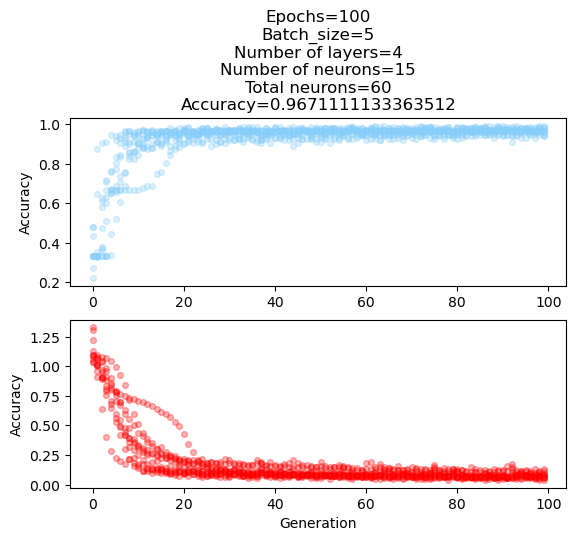

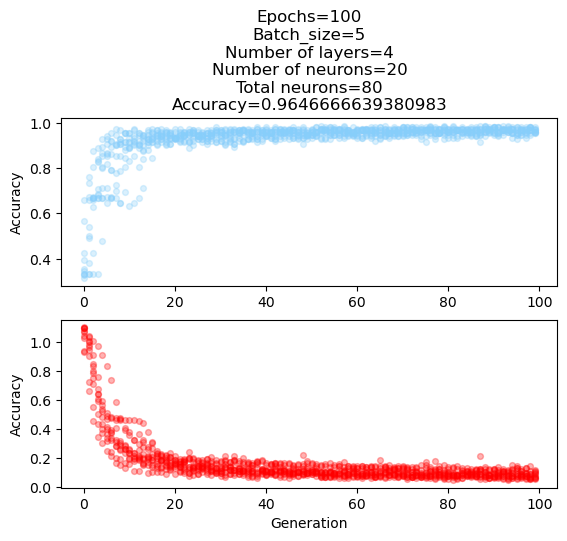

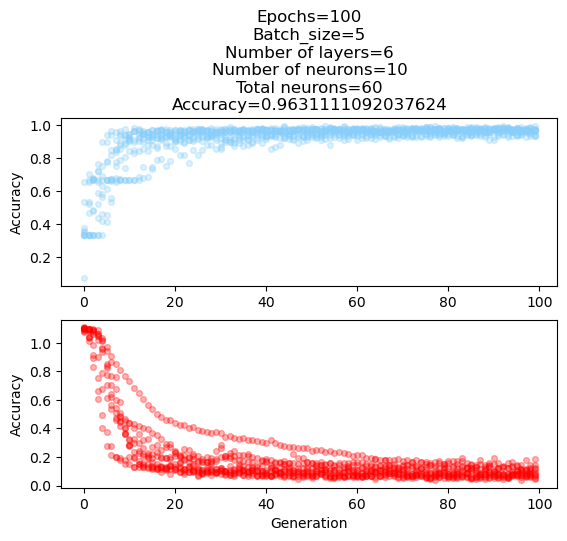

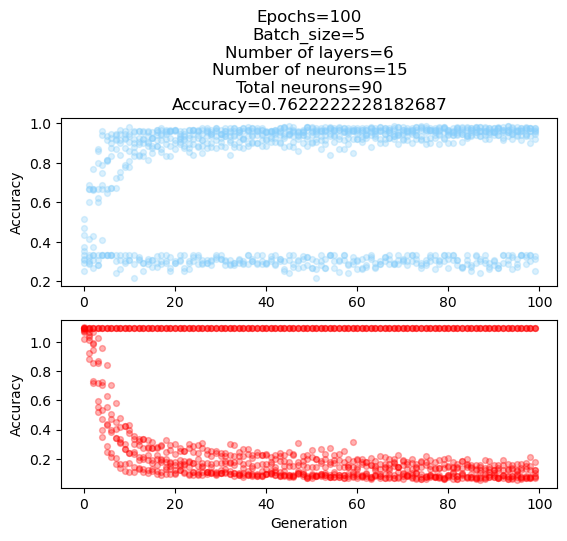

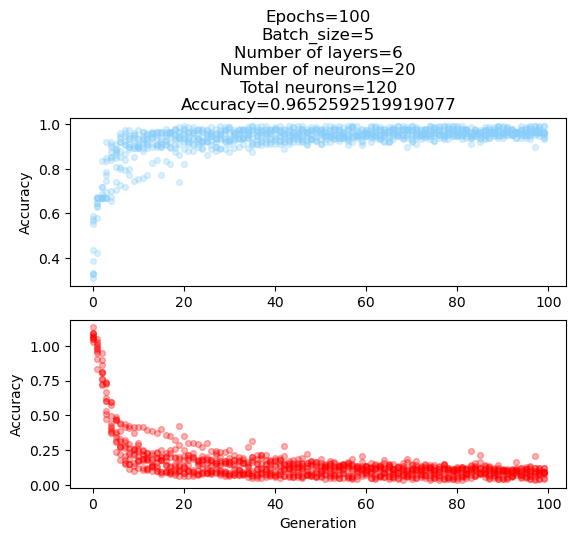

In [12]:
#количество симуляций обучения для каждого варианта архитектуры
count=10

#параметры обцчения
epochs=100
batch_size=5

#массив данных которые мы будем перебирать для генерации различных архитектур
number_of_layers=[1,2,4,6]
number_of_neurons=[10,15,20]

#генератор
for m in range(len(number_of_layers)):
    for n in range(len(number_of_neurons)):
        total_neurons=number_of_neurons[n]*number_of_layers[m]
        fig, ax = plt.subplots(nrows=2, ncols=1)
        ax[0].set_ylabel("Accuracy");
        ax[1].set_xlabel("Generation");
        ax[1].set_ylabel("Accuracy");
        accuracy_mean=0;
        
        for i in range(count):
            #задаем архитектру сети
            model = Sequential()
            model.add(Dense(4, activation='relu'))
            for j in range(number_of_layers[m]):
                model.add(Dense(number_of_neurons[n], activation='relu'))
            model.add(Dense(3, activation='softmax'))
            
            #инициализируем обучение сети
            model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
            
            #запускаем обучение
            history =model.fit(X, dummy_y, epochs=epochs, batch_size=batch_size,verbose = 0)
            
            #складываем точность за последние 10 итераций
            accuracy_mean+=sum([i for i in history.history["accuracy"][-10:-1]])/9
                
            #добавляем графики с полученными данными
            ax[0].scatter([i for i in range(len(history.history["accuracy"]))], history.history["accuracy"], alpha=0.3, marker = '.',s=70, color = 'lightskyblue')           
            ax[1].scatter([i for i in range(len(history.history["loss"]))], history.history["loss"], alpha=0.3, marker = '.',s=70, color = 'red') 
            
            #выводим прогресс генерации
            print(f"Done number of layers: {m}/{len(number_of_layers)} ["+"="*m+" "*(len(number_of_layers)-m)+"]")
            print(f"Done number of neurons: {n}/{len(number_of_neurons)} ["+"="*n+" "*(len(number_of_neurons)-n)+"]")
            print(f"Done: {i}/{count} ["+"="*i+" "*(count-i)+"]")
            clear_output(wait=True)
        
        #вычисляем среднюю точность модели за последние 9 итераций каждой её симуляции и выводим параметры сети в заголовок графика
        accuracy_mean/=count  
        ax[0].set_title(f"Epochs={epochs}\nBatch_size={batch_size}\nNumber of layers={number_of_layers[m]}\nNumber of neurons={number_of_neurons[n]}\nTotal neurons={total_neurons}\nAccuracy={accuracy_mean}")    

#отобразим полученные графики
plt.show()
    



По графикам видно, что самый оптимальный вариант архитектуры для текущего задания это 2 скрытых слоя по 15 нейронов. Данный вариант имеет высокую скорость обучения, благодаря небольшому количеству нейронов и слоев в сравнение с другими варианатами архитектуры показавшими схожую эффективность. При этом как видно по графику, данная архитектура обеспечивает обучение до самого высокого показателя точности. Поэтому для выбора наиболее подходящих параметров обучения был выбран этот вариант архитектуры.

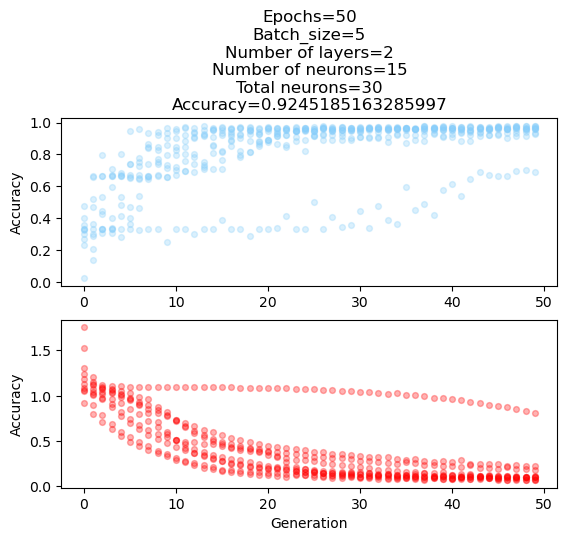

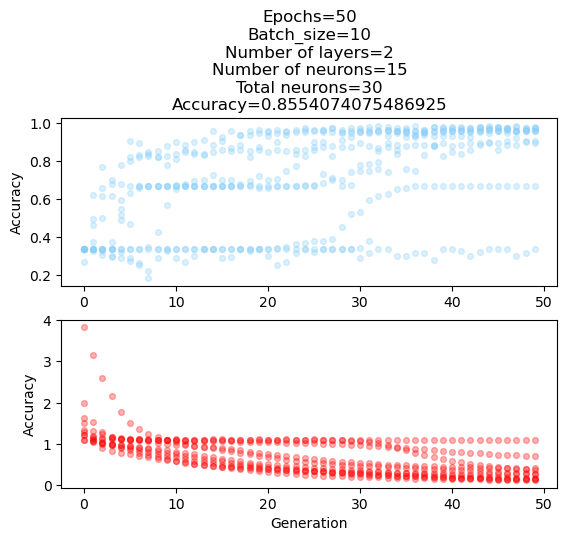

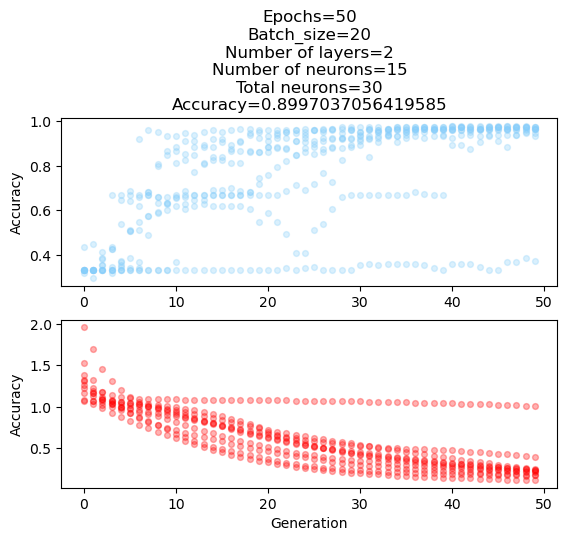

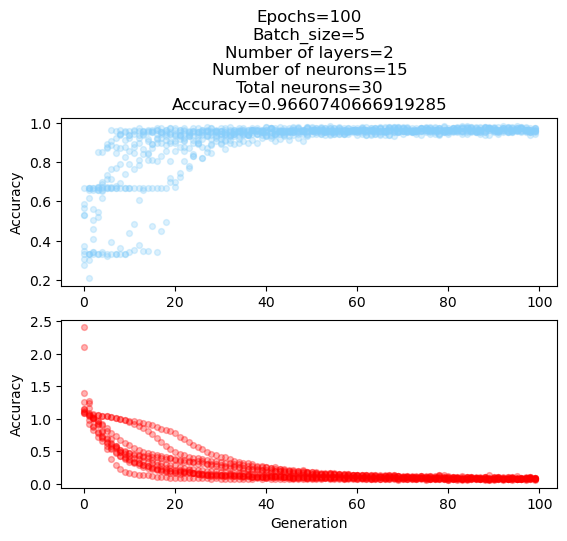

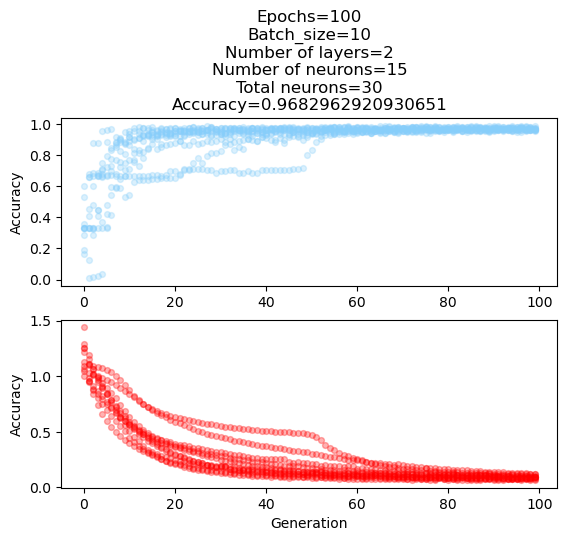

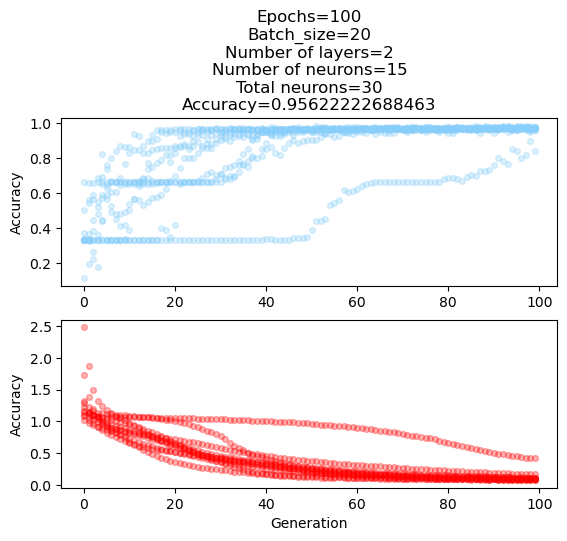

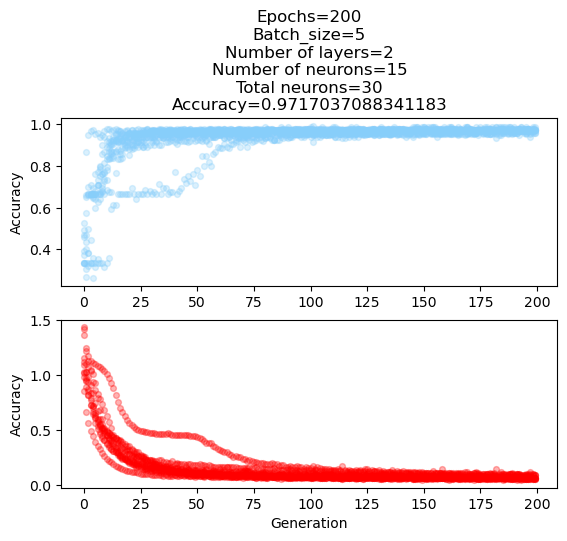

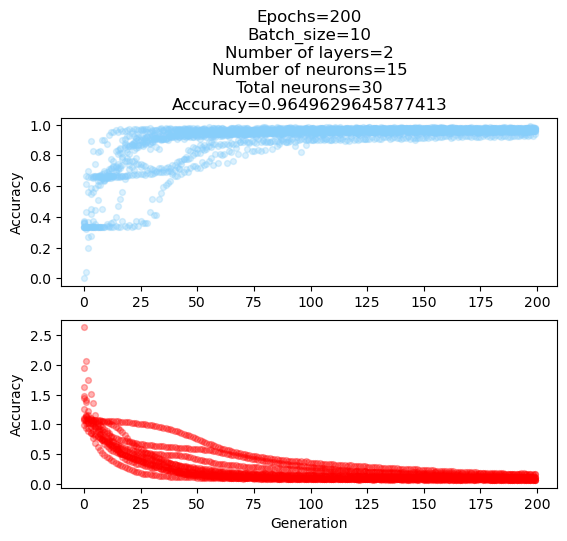

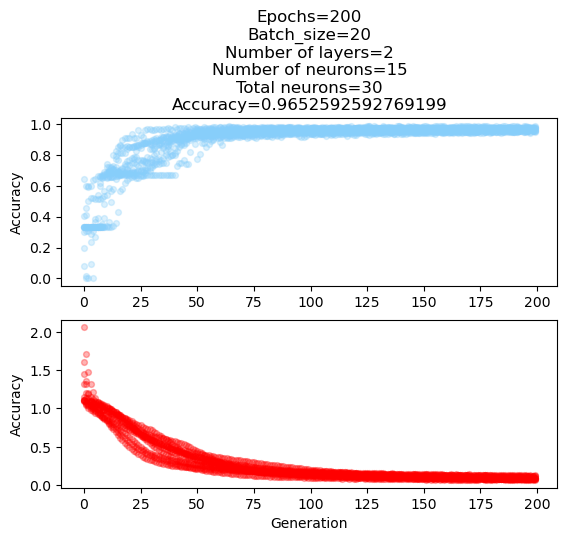

In [14]:
count=10


epochs=[50,100,200]
batch_size=[5,10,20]

number_of_layers=2
number_of_neurons=15


for m in range(len(epochs)):
    for n in range(len(batch_size)):
        total_neurons=number_of_neurons*number_of_layers
        fig, ax = plt.subplots(nrows=2, ncols=1)      
        ax[0].set_ylabel("Accuracy");
        ax[1].set_xlabel("Generation");
        ax[1].set_ylabel("Accuracy");
        accuracy_mean=0;
        for i in range(count):

            model = Sequential()
            model.add(Dense(4, activation='relu'))
            for j in range(number_of_layers):
                model.add(Dense(number_of_neurons, activation='relu'))
            model.add(Dense(3, activation='softmax'))
            model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
            history =model.fit(X, dummy_y, epochs=epochs[m], batch_size=batch_size[n],verbose = 0)
            
            accuracy_mean+=sum([i for i in history.history["accuracy"][-10:-1]])/9
                
            ax[0].scatter([i for i in range(len(history.history["accuracy"]))], history.history["accuracy"], alpha=0.3, marker = '.',s=70, color = 'lightskyblue') 
            ax[1].scatter([i for i in range(len(history.history["loss"]))], history.history["loss"], alpha=0.3, marker = '.',s=70, color = 'red') 
            
            print(f"Done epochs: {m}/{len(epochs)} ["+"="*m+" "*(len(epochs)-m)+"]")
            print(f"Done batch_size: {n}/{len(batch_size)} ["+"="*n+" "*(len(batch_size)-n)+"]")
            print(f"Done: {i}/{count} ["+"="*i+" "*(count-i)+"]")
            clear_output(wait=True)
        
        accuracy_mean/=count  
        ax[0].set_title(f"Epochs={epochs[m]}\nBatch_size={batch_size[n]}\nNumber of layers={number_of_layers}\nNumber of neurons={number_of_neurons}\nTotal neurons={total_neurons}\nAccuracy={accuracy_mean}")    

plt.show()

По графикам видно, что оптимальный размер пакета для обучения равняется 5. При этом видно, что обучать нейросеть более 100 
итераций не имеет смысла, так как заметное повышение точности не наблюдается. При этом обучение менее 100 итераций не дает максимальное значение точности, при котором дальнейшее обучение не имеет смысслы. Поэтому можно сделать вывод, что оптимальный вариант - это нейросеть имеющая 2 скрытых слоя по 15 нейронов и обученная на пакетах по 5 элементах в течение 100 итераций